In [1]:
#step 1 - Importing all required libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Step 2 - Creating a pandas dataframe "df_311nyc" from the data available in csv format

In [4]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_51a3837687ca424c88d81a9214afdc84 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='<replace_with_your_ibm_api_key_id>',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_51a3837687ca424c88d81a9214afdc84.get_object(Bucket='<replace_with_your_bucket_id>',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_311nyc = pd.read_csv(body)
df_311nyc.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-01T17:14:28.000,43695466,UNSANITARY CONDITION,11368.0,97-05 HORACE HARDING EXPRESSWAY,HORACE HARDING EXPRESSWAY,ADDRESS,Corona,The following complaint conditions are still o...,QUEENS,40.734899,-73.862526,NaN,RESIDENTIAL BUILDING,Open
1,2019-09-01T14:31:35.000,43697294,GENERAL,11233.0,110 ROCHESTER AVENUE,ROCHESTER AVENUE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.675350,-73.927728,NaN,RESIDENTIAL BUILDING,Open
2,2019-09-01T20:28:51.000,43701077,HEAT/HOT WATER,11225.0,271 HAWTHORNE STREET,HAWTHORNE STREET,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.657774,-73.951466,NaN,RESIDENTIAL BUILDING,Open
3,2019-09-01T11:54:18.000,43697359,WATER LEAK,10467.0,2714 WALLACE AVENUE,WALLACE AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.865959,-73.864435,NaN,RESIDENTIAL BUILDING,Open
4,2019-09-01T14:53:00.000,43694530,HEAT/HOT WATER,11225.0,271 HAWTHORNE STREET,HAWTHORNE STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.657774,-73.951466,NaN,RESIDENTIAL BUILDING,Open


In [5]:
#As concluded in problem set 1, the top complaint is HEAT/HOT WATER and as concluded in problem set 2, this top complaint is most severe in borough BRONX, hence we will focus the results of problem set 3 on this complaint type and borough

In [6]:
#Step - 3 Creating a sub dataframe "df_311nyc_bronx" containing only samples for BRONX borough from the main dataframe "df_311nyc" 

In [7]:
df_311nyc_bronx = df_311nyc[df_311nyc["borough"]=="BRONX"].reset_index(drop=True)
df_311nyc_bronx.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-01T11:54:18.000,43697359,WATER LEAK,10467.0,2714 WALLACE AVENUE,WALLACE AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.865959,-73.864435,NaN,RESIDENTIAL BUILDING,Open
1,2019-09-01T17:08:51.000,43697327,WATER LEAK,10451.0,825 GERARD AVENUE,GERARD AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.825866,-73.925913,NaN,RESIDENTIAL BUILDING,Open
2,2019-09-01T08:43:30.000,43698330,WATER LEAK,10458.0,2333 WEBSTER AVENUE,WEBSTER AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.857332,-73.894898,NaN,RESIDENTIAL BUILDING,Open
3,2019-09-01T19:57:36.000,43697319,PLUMBING,10457.0,1745 EASTBURN AVENUE,EASTBURN AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.845428,-73.908434,NaN,RESIDENTIAL BUILDING,Open
4,2019-09-01T03:14:34.000,43694562,UNSANITARY CONDITION,10456.0,1305 CLAY AVENUE,CLAY AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.834999,-73.909132,NaN,RESIDENTIAL BUILDING,Open


In [8]:
#Step - 4 Creating a sub dataframe "df_311nyc_bronx_heat" containing only samples for BRONX borough with HEAT/HOT WATER complaint type from the dataframe "df_311nyc_bronx" 

In [9]:
df_311nyc_bronx_heat = df_311nyc_bronx[df_311nyc_bronx["complaint_type"]=="HEAT/HOT WATER"].reset_index(drop=True)
df_311nyc_bronx_heat.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-01T13:43:18.000,43696372,HEAT/HOT WATER,10460.0,2070 VYSE AVENUE,VYSE AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.843197,-73.881089,NaN,RESIDENTIAL BUILDING,Open
1,2019-09-01T19:14:52.000,43695452,HEAT/HOT WATER,10454.0,545 EAST 144 STREET,EAST 144 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.811262,-73.915623,NaN,RESIDENTIAL BUILDING,Open
2,2019-09-01T11:53:27.000,43695443,HEAT/HOT WATER,10457.0,730 GARDEN STREET,GARDEN STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.850422,-73.885113,NaN,RESIDENTIAL BUILDING,Open
3,2019-09-01T09:56:15.000,43701073,HEAT/HOT WATER,10468.0,2760 JEROME AVENUE,JEROME AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.869458,-73.895537,NaN,RESIDENTIAL BUILDING,Open
4,2019-09-01T11:14:01.000,43694499,HEAT/HOT WATER,10454.0,619 EAST 140 STREET,EAST 140 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.807452,-73.914942,NaN,RESIDENTIAL BUILDING,Open


In [10]:
#Step - 5 Analyzing if there is any relation between the top complaint type and house characteristics by calculating the total number of top complaint from each house in bronx and trying to identify if its prevelent because of some particular characteristics of that house by merging our both datasets

In [11]:
#Step - 6 Creating sub dataframe dataframe "df_address_complaint" that only contains only those columns required for analysis from the dataframe "df_311nyc_bronx_heat"

In [12]:
df_address_complaint = df_311nyc_bronx_heat[["incident_address","complaint_type"]]
df_address_complaint.head()

,incident_address,complaint_type
0,2070 VYSE AVENUE,HEAT/HOT WATER
1,545 EAST 144 STREET,HEAT/HOT WATER
2,730 GARDEN STREET,HEAT/HOT WATER
3,2760 JEROME AVENUE,HEAT/HOT WATER
4,619 EAST 140 STREET,HEAT/HOT WATER


In [13]:
#Step 7 - Calculating total number of complaints per address

In [14]:
df_address_complaint_group = df_address_complaint.groupby("incident_address")
df_address_complaint_total = df_address_complaint_group.count()
df_address_complaint_total.head()

,complaint_type
incident_address,
1 DOROTHEA PLACE,1
1 EAST 169 STREET,1
1 EAST 198 STREET,23
1 EAST 198 STREET,12
1 METROPOLITAN OVAL,28


In [15]:
#Step 8 - Changing column name "complaint_type" to "total_complaints" for convinence

In [16]:
df_address_complaint_total.columns = ["total_complaints"]
df_address_complaint_total.head()

,total_complaints
incident_address,
1 DOROTHEA PLACE,1
1 EAST 169 STREET,1
1 EAST 198 STREET,23
1 EAST 198 STREET,12
1 METROPOLITAN OVAL,28


In [17]:
#Step 9 - Creating a pandas dataframe "df_pluto" with the suggested columns from the data available in csv format 

In [18]:
body = client_51a3837687ca424c88d81a9214afdc84.get_object(Bucket='edx-donotdelete-pr-eroq0nxwstcsdh',Key='pluto_18v2_1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_pluto = pd.read_csv(body, usecols = ['address','bldgarea','bldgdepth','builtfar','commfar','facilfar','lot','lotarea','lotdepth','numbldgs','numfloors','officearea','resarea','residfar','retailarea','yearbuilt','yearalter1'])
df_pluto.head()


,lot,address,lotarea,bldgarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar
0,670.0,CITY ISLAND AVENUE,53758.0,0.0,NaN,NaN,NaN,0.0,0.0,219.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0
1,3.0,8-03 117 STREET,10870.0,3130.0,3130.0,0.0,0.0,1.0,2.5,113.17,25.0,1915.0,1995.0,0.29,0.50,0.0,1.0
2,41.0,SEMINOLE AVENUE,2369.0,0.0,NaN,NaN,NaN,0.0,0.0,95.06,0.0,0.0,0.0,0.00,0.90,0.0,2.0
3,14.0,EAST 156 STREET,3750.0,0.0,NaN,NaN,NaN,0.0,0.0,100.00,0.0,0.0,0.0,0.00,2.43,0.0,4.8
4,83.0,216 FRANKLIN AVENUE,3465.0,1590.0,1590.0,0.0,0.0,1.0,2.5,105.00,30.0,1901.0,0.0,0.46,0.50,0.0,1.0


In [19]:
#Step 10 - Removing all duplicates for "address" column from df_pluto before merging the two dataframes

In [20]:
df_pluto.drop_duplicates(subset="address", keep='first', inplace=True)

In [21]:
#Step 11 - Merging the two dataframes "df_address_complaint_total" and "df_pluto" into "df_merged" for further analysis

In [22]:
df_merged = pd.merge(df_address_complaint_total, df_pluto, left_index=True, right_on="address", how="right")

In [23]:
df_merged.reset_index(drop=True)
df_merged.head()

,total_complaints,lot,address,lotarea,bldgarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar
0,NaN,670.0,CITY ISLAND AVENUE,53758.0,0.0,NaN,NaN,NaN,0.0,0.0,219.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0
1,NaN,3.0,8-03 117 STREET,10870.0,3130.0,3130.0,0.0,0.0,1.0,2.5,113.17,25.0,1915.0,1995.0,0.29,0.50,0.0,1.0
2,NaN,41.0,SEMINOLE AVENUE,2369.0,0.0,NaN,NaN,NaN,0.0,0.0,95.06,0.0,0.0,0.0,0.00,0.90,0.0,2.0
3,NaN,14.0,EAST 156 STREET,3750.0,0.0,NaN,NaN,NaN,0.0,0.0,100.00,0.0,0.0,0.0,0.00,2.43,0.0,4.8
4,NaN,83.0,216 FRANKLIN AVENUE,3465.0,1590.0,1590.0,0.0,0.0,1.0,2.5,105.00,30.0,1901.0,0.0,0.46,0.50,0.0,1.0


In [24]:
#Step 12 - Getting high-level information about the newly merged dataframe

In [25]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828595 entries, 0 to 858981
Data columns (total 18 columns):
total_complaints    13293 non-null float64
lot                 828595 non-null float64
address             828594 non-null object
lotarea             828576 non-null float64
bldgarea            828595 non-null float64
resarea             803202 non-null float64
officearea          803202 non-null float64
retailarea          803202 non-null float64
numbldgs            828576 non-null float64
numfloors           828576 non-null float64
lotdepth            826904 non-null float64
bldgdepth           828576 non-null float64
yearbuilt           828595 non-null float64
yearalter1          828595 non-null float64
builtfar            826300 non-null float64
residfar            828595 non-null float64
commfar             828595 non-null float64
facilfar            828595 non-null float64
dtypes: float64(17), object(1)
memory usage: 120.1+ MB


In [26]:
#Step 13 - Identifying if any realtion exists between the complaint type and house characteristics using "Pearson Correlation" method

In [27]:
corr1 = df_merged.corr(method="pearson")
corr1

,total_complaints,lot,lotarea,bldgarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar
total_complaints,1.000000,-0.002421,0.030533,0.126732,0.151571,-0.005523,0.009355,-0.017036,0.210484,0.070026,0.177558,0.004789,0.049019,0.023000,0.133529,-0.008781,0.119902
lot,-0.002421,1.000000,0.003284,0.097239,0.112431,0.042098,0.068721,0.037236,0.206839,0.005316,0.001763,-0.052872,0.034102,0.023951,0.139890,0.112593,0.127012
lotarea,0.030533,0.003284,1.000000,0.378164,0.050752,0.014440,0.015680,0.240512,0.007348,0.367299,0.021196,-0.006870,0.008887,-0.000082,-0.004246,0.005817,-0.002368
bldgarea,0.126732,0.097239,0.378164,1.000000,0.606092,0.445011,0.252780,0.197860,0.439555,0.283570,0.232024,0.011039,0.079462,0.009596,0.178538,0.194243,0.182425
resarea,0.151571,0.112431,0.050752,0.606092,1.000000,0.007900,0.092643,0.175183,0.399387,0.201340,0.152978,-0.021279,0.057743,0.010056,0.173782,0.069902,0.154287
officearea,-0.005523,0.042098,0.014440,0.445011,0.007900,1.000000,0.156975,0.007209,0.361953,0.108030,0.138256,-0.003933,0.047865,0.005378,0.130688,0.269527,0.151687
retailarea,0.009355,0.068721,0.015680,0.252780,0.092643,0.156975,1.000000,0.005982,0.154975,0.108580,0.140438,-0.008627,0.059356,0.006798,0.106391,0.166235,0.114085
numbldgs,-0.017036,0.037236,0.240512,0.197860,0.175183,0.007209,0.005982,1.000000,0.005469,0.143389,0.007681,0.037524,0.000930,0.000025,-0.034261,-0.011687,-0.033424
numfloors,0.210484,0.206839,0.007348,0.439555,0.399387,0.361953,0.154975,0.005469,1.000000,0.083109,0.259246,0.194475,0.192414,0.015736,0.482483,0.370646,0.441547
lotdepth,0.070026,0.005316,0.367299,0.283570,0.201340,0.108030,0.108580,0.143389,0.083109,1.000000,0.222124,-0.025250,0.042400,-0.003258,-0.017110,0.045620,-0.003022


In [28]:
"""Preliminary Conclusion - From the results above, we can see that there is little but positive correlation between the top complaint and house characteristics
lotarea, bldgarea, resarea, retailarea, numfloors, lotdepth, bldgdepth, yearbuilt, yearalter1, builtfar, residfar, facilfar
"""

'Preliminary Conclusion - From the results above, we can see that there is little but positive correlation between the top complaint and house characteristics\nlotarea, bldgarea, resarea, retailarea, numfloors, lotdepth, bldgdepth, yearbuilt, yearalter1, builtfar, residfar, facilfar\n'

In [29]:
#Step 14 - Implementing heatmap to visualize correlation graphically and support our conclusion

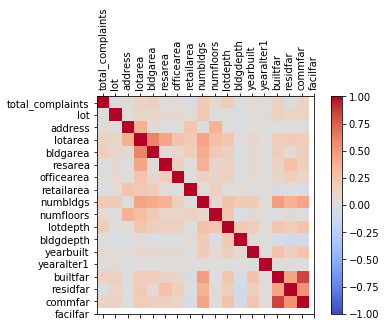

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr1,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_merged.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_merged.columns)
ax.set_yticklabels(df_merged.columns)
plt.show()

In [31]:
"""Preliminary Conclusion - From the above heat map, we can see that it supports our previous conclusion and we will consider those characteristics only that falls between the range of 0.5 to 0.75 or >0.1
i.e. bldgarea, resarea, numfloors, bldgdepth, lotdepth (others to be ignored as they do not fall as house characteristics)"""

'Preliminary Conclusion - From the above heat map, we can see that it supports our previous conclusion and we will consider those characteristics only that falls between the range of 0.5 to 0.75 or >0.1\ni.e. bldgarea, resarea, numfloors, bldgdepth, lotdepth (others to be ignored as they do not fall as house characteristics)'

In [32]:
#Step 15 - Identifying if any realtion exists between the complaint type and house characteristics using "Spearman Correlation" method

In [33]:
corr2 = df_merged.corr(method="spearman")
corr2

,total_complaints,lot,lotarea,bldgarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar
total_complaints,1.000000,-0.056814,0.450367,0.553533,0.589085,0.026335,0.120342,-0.119513,0.556023,0.126939,0.462433,-0.053615,0.147988,0.549338,0.323055,-0.021982,0.302418
lot,-0.056814,1.000000,-0.035985,-0.058203,0.002805,-0.034122,-0.078097,-0.043907,-0.014164,0.008067,-0.066331,0.105746,-0.035852,-0.031042,-0.039760,-0.035716,-0.056262
lotarea,0.450367,-0.035985,1.000000,0.185100,0.073868,0.103430,-0.015202,0.223335,-0.097136,0.410624,0.077170,0.163380,0.110216,-0.420347,-0.340127,0.092743,-0.265481
bldgarea,0.553533,-0.058203,0.185100,1.000000,0.670051,0.212134,0.305309,-0.103856,0.534151,0.106745,0.695281,-0.006646,0.288443,0.725186,0.428772,0.193303,0.444175
resarea,0.589085,0.002805,0.073868,0.670051,1.000000,-0.130995,-0.017107,-0.055904,0.598345,0.055588,0.395813,-0.104152,0.137878,0.490229,0.345163,-0.110364,0.257983
officearea,0.026335,-0.034122,0.103430,0.212134,-0.130995,1.000000,0.170337,-0.046455,0.066242,0.040473,0.175482,0.020113,0.149948,0.156638,0.079618,0.268138,0.151279
retailarea,0.120342,-0.078097,-0.015202,0.305309,-0.017107,0.170337,1.000000,-0.102341,0.148353,-0.075323,0.279567,-0.082898,0.189310,0.297652,0.253267,0.329794,0.289266
numbldgs,-0.119513,-0.043907,0.223335,-0.103856,-0.055904,-0.046455,-0.102341,1.000000,0.010725,0.103938,-0.106346,-0.096684,-0.022941,-0.239660,-0.209077,-0.091632,-0.195200
numfloors,0.556023,-0.014164,-0.097136,0.534151,0.598345,0.066242,0.148353,0.010725,1.000000,-0.006189,0.259246,-0.107163,0.186951,0.597980,0.381609,0.020190,0.310356
lotdepth,0.126939,0.008067,0.410624,0.106745,0.055588,0.040473,-0.075323,0.103938,-0.006189,1.000000,0.151747,0.016489,0.038211,-0.150086,-0.062041,0.015555,-0.042644


In [34]:
#Step 14 - Implementing heatmap to visualize correlation graphically and support our conclusion

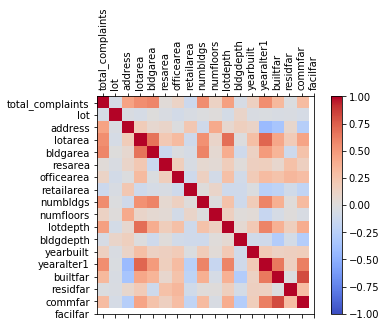

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr2,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_merged.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_merged.columns)
ax.set_yticklabels(df_merged.columns)
plt.show()

In [36]:
"""Final Conclusion - Analyzing results of correlation from pearson and spearman method supports our conclusion that there exist little but positive relation between the top complaint type i.e. HEAT/HOT WATER and house characteristics - 
bldgarea, resarea, lotarea, numfloors, lotdepth, bldgdepth (others to be ignored as they do not fall as house characteristics)"""

'Final Conclusion - Analyzing results of correlation from pearson and spearman method supports our conclusion that there exist little but positive relation between the top complaint type i.e. HEAT/HOT WATER and house characteristics - \nbldgarea, resarea, lotarea, numfloors, lotdepth, bldgdepth (others to be ignored as they do not fall as house characteristics)'